In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Datos_Portadas.csv")
data = pd.DataFrame(df)
print(data.describe())

              year   cant_notas     politica         roja     deporte  \
count  5770.000000  5770.000000  5770.000000  5770.000000  5769.00000   
mean   2022.995494     3.867764     0.057886     0.368631     0.50702   
std       0.826402     0.665379     0.272590     0.710338     0.58943   
min    2022.000000     0.000000     0.000000     0.000000     0.00000   
25%    2022.000000     4.000000     0.000000     0.000000     0.00000   
50%    2023.000000     4.000000     0.000000     0.000000     0.00000   
75%    2024.000000     4.000000     0.000000     1.000000     1.00000   
max    2025.000000     6.000000     4.000000     5.000000     3.00000   

         accidente  comunitaria   nacionales  internacional  modelo_portada  \
count  5770.000000  5770.000000  5770.000000    5770.000000     5770.000000   
mean      0.389948     2.278683     0.239168       0.028769        0.008666   
std       0.624598     1.321180     0.618929       0.177238        0.092693   
min       0.000000     0.0

In [4]:
import nltk
from nltk.corpus import stopwords

spanish_stopwords = [
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las",
    "por", "un", "para", "con", "no", "una", "su", "al", "es", "lo",
    "como", "más", "pero", "sus", "le", "ya", "o", "fue", "me", "si",
    "sin", "sobre", "este", "ya", "también", "entre", "cuando", "uno", "dos",
    "tres", "cuatro", "cinco", "seis", "siete", "ocho", "nueve", "mas", "diez", "1",
    "2", "3", "4", "5", "6", "7", "8", "9", "10", "11","12", "13", "14", "15", "16",
    "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30",
    "aã", "tras", "mil", "anos", "tras", "niã", "son", "contra", "fueron", "hasta",
    "queda", "hasta", "os", "sera", "durante", "van", "han", "q1", "q2", "q3", "q4", "q5", "q6",
    "q7", "q8", "q9", "q10", "deja", "ante", "han", "estan", "pierde", "ha", "dia", "50", "2022",
    "desde", "despues", "ano", "dias", "otra", "luego", "km", "pedro", "2024", "2025", "2023", "hace",
    "donde", "otro", "daã", "iba", "les", "dan", "45", "tienen", "hacen", "juan"
]

vectorizer = CountVectorizer(max_features=5000, stop_words=spanish_stopwords)

In [5]:
# Fill NaN values with an empty string
data["titulo"] = data["titulo"].fillna("").astype(str)
data["subtitular"] = data["subtitular"].fillna("").astype(str)

data["text"] = data["titulo"] + " " + data["subtitular"]

In [6]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

# Download Spanish stopwords (only needed once)
#nltk.download("stopwords")
#spanish_stopwords = stopwords.words("spanish")

# Define range of parameters to test
n_components_range = [5, 10, 15, 20, 25]  # Example LDA n_components values
num_classes_range = [5, 10, 15, 20]  # Example LCA num_classes values

# Prepare an empty list to store the latent class distributions
distributions = []

for n_components in n_components_range:
    for num_classes in num_classes_range:
        # Apply LDA with Spanish stop words
        vectorizer = CountVectorizer(max_features=5000, stop_words=spanish_stopwords)
        X = vectorizer.fit_transform(data["text"])

        lda = LatentDirichletAllocation(n_components=n_components, random_state=42)
        X_topics = lda.fit_transform(X)
        data["topic"] = X_topics.argmax(axis=1)

        # Apply OneHotEncoder
        encoder = OneHotEncoder(sparse_output=False)
        X_lca = encoder.fit_transform(data[["topic"]])

        # Apply LCA (GaussianMixture)
        lca_model = GaussianMixture(n_components=num_classes, covariance_type="full", random_state=42)
        data["latent_class"] = lca_model.fit_predict(X_lca)

        # Calculate class distribution
        class_distribution = data["latent_class"].value_counts().values
        distributions.append([n_components, num_classes, class_distribution])

# Convert results into a DataFrame for visualization
distributions_df = pd.DataFrame(distributions, columns=["n_components", "num_classes", "class_distribution"])

# Make sure all classes are represented in each distribution
distributions_df["class_count"] = distributions_df["class_distribution"].apply(lambda x: np.sum(x))


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/ho

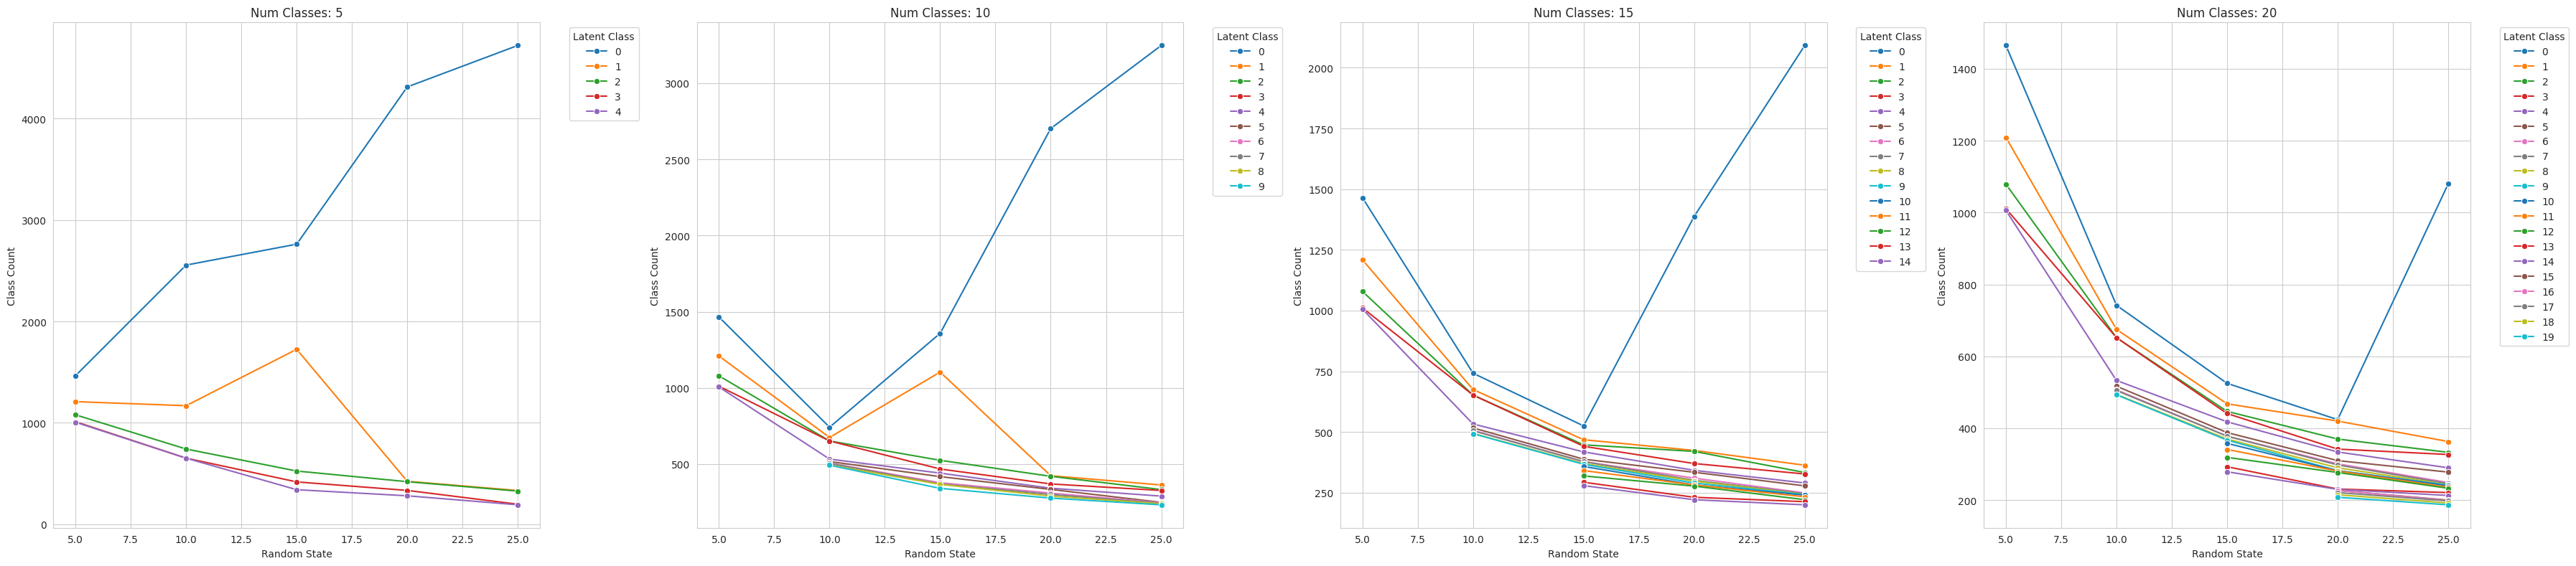

In [7]:
# Define a broader range of random states (e.g., 20 values between 0 and 3000)
random_state_range = np.linspace(0, 3000, dtype=int)

# Convert class distributions into DataFrame
plot_data = []

for entry in distributions:
    random_state, num_classes, class_distribution = entry  # Ensure distributions include random_state
    for class_idx, count in enumerate(class_distribution):
        plot_data.append([random_state, num_classes, class_idx, count])

# Create DataFrame
plot_df = pd.DataFrame(plot_data, columns=["random_state", "num_classes", "class_idx", "count"])

# Plot distributions for each num_classes set
plt.figure(figsize=(36, 8))
sns.set_style("whitegrid")

for idx, num_classes in enumerate(num_classes_range):
    plt.subplot(1, len(num_classes_range), idx + 1)
    subset = plot_df[plot_df["num_classes"] == num_classes]
    sns.lineplot(
        x="random_state", y="count", hue="class_idx", data=subset, marker="o", palette="tab10"
    )
    plt.title(f"Num Classes: {num_classes}")
    plt.xlabel("Random State")
    plt.ylabel("Class Count")
    plt.legend(title="Latent Class", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()

plt.show()

In [8]:
from sklearn.mixture import GaussianMixture

bics = []
aics = []
class_range = range(2, 30)  # Try between 2 and 10 classes

for n in class_range:
    gmm = GaussianMixture(n_components=n, covariance_type="tied", random_state=50)
    gmm.fit(X_lca)
    bics.append(gmm.bic(X_lca))
    aics.append(gmm.aic(X_lca))

bic_scores = class_range[np.argmin(bics)]
print(f"Optimal number of classes based on BIC: {bic_scores}")


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (26). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (27). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (28). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (29). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Optimal number of classes based on BIC: 25


In [10]:
# Standardize data
scaler = StandardScaler()
X_lca_scaled = scaler.fit_transform(X_lca)

# Define range of latent classes to test
class_range = range(2, 30)  # Try between 2 and 30 classes

# Store results
aic_scores = []
entropy_scores = []

def entropy(probs):
    return -np.sum(probs * np.log(probs + 1e-10), axis=1).mean()

for n in class_range:
    lca_model = GaussianMixture(n_components=n, covariance_type="spherical", init_params="kmeans", random_state=25)
    lca_model.fit(X_lca_scaled)

    # Compute AIC
    aic_scores.append(lca_model.aic(X_lca_scaled))

    # Compute Entropy
    class_probs = lca_model.predict_proba(X_lca_scaled)
    entropy_scores.append(entropy(class_probs))

# Plot AIC and Entropy
fig, ax1 = plt.subplots()

ax1.set_xlabel("Number of Classes")
ax1.set_ylabel("AIC", color="tab:blue")
ax1.plot(class_range, aic_scores, marker="o", color="tab:blue", label="AIC")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Entropy", color="tab:red")
ax2.plot(class_range, entropy_scores, marker="s", color="tab:red", label="Entropy")
ax2.tick_params(axis="y", labelcolor="tab:red")

fig.tight_layout()
plt.title("AIC vs Entropy for Different Class Counts")
plt.show()

NameError: name 'StandardScaler' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_lca_scaled = scaler.fit_transform(X_lca)

# Define number of latent classes
num_classes = 19

# Fit LCA model using Gaussian Mixture Model (GMM)
lca_model = GaussianMixture(n_components=num_classes, covariance_type="spherical", init_params="kmeans", random_state=20)
data["latent_class"] = lca_model.fit_predict(X_lca)

# Check class distribution
print(data["latent_class"].value_counts())

latent_class
12    905
0     430
8     373
7     363
1     333
3     327
5     290
6     278
2     249
13    246
15    242
11    240
10    236
4     233
9     221
14    213
16    200
17    199
18    192
Name: count, dtype: int64


In [11]:
def entropy(probs):
    return -np.sum(probs * np.log(probs + 1e-10), axis=1).mean()

class_probs = lca_model.predict_proba(X_lca)
print("LCA Model Entropy:", entropy(class_probs))

# Get AIC value
aic_value = lca_model.aic(X_lca_scaled)
print(f"AIC: {aic_value}")

LCA Model Entropy: -1.0000000826903712e-10


NameError: name 'X_lca_scaled' is not defined

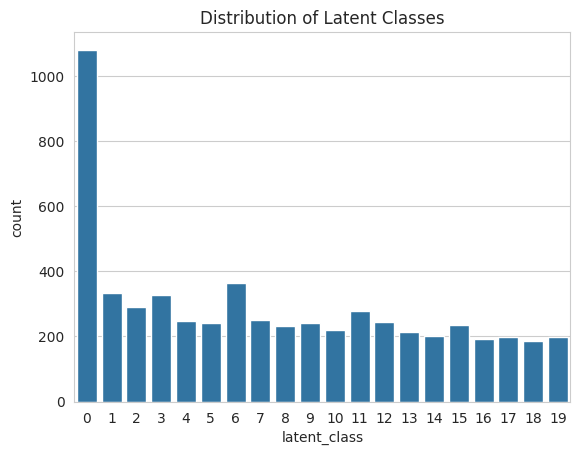

In [12]:
sns.countplot(x=data["latent_class"])
plt.title("Distribution of Latent Classes")
plt.show()

In [13]:
print(data.groupby("latent_class")["topic"].value_counts())

latent_class  topic
0             16       206
              12       184
              2        175
              14       174
              20       174
              13       167
1             9        333
2             17       290
3             5        327
4             19       246
5             0        242
6             7        363
7             22       249
8             21       233
9             6        240
10            24       221
11            11       278
12            15       243
13            8        213
14            10       200
15            3        236
16            1        192
17            4        198
18            23       187
19            18       199
Name: count, dtype: int64


In [14]:
# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Function to extract top words per topic
def get_top_words(lda_model, feature_names, num_words=15):
    topic_keywords = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        top_keywords = [feature_names[i] for i in topic.argsort()[-num_words:]]  
        topic_keywords[topic_idx] = top_keywords
    return topic_keywords

# Get words for each topic
topic_keywords = get_top_words(lda, feature_names)

# Display top words per topic
for topic, words in topic_keywords.items():
    print(f"Topic {topic}: {', '.join(words)}")


Topic 0: jose, semanas, vehiculos, casos, esta, trabajos, aldea, municipios, centros, autoridades, afectados, vecinos, sacatepequez, marcos, san
Topic 1: trabajo, ruta, autoridades, mueren, ataque, mientras, hecho, ladron, presunto, paso, hombre, cementerio, victima, esta, matan
Topic 2: policia, atender, viviendas, centros, visitan, rio, sufre, muerte, hallan, aumento, llegan, alumnos, preparan, ciclo, escolar
Topic 3: barranco, mexico, mujer, edad, familia, violencia, denuncias, menores, perdidas, migrantes, estados, unidos, personas, vida, incendio
Topic 4: disparan, hermosa, zona, construccion, obra, desnivel, ruta, lluvias, proyecto, municipios, personas, ataque, armado, millones, paso
Topic 5: muerto, camion, trailer, causa, mujer, vehiculo, cae, picop, control, percance, conductor, muere, chofer, accidente, heridos
Topic 6: alerta, departamentos, verapaz, zona, fieles, captura, hombre, alta, policia, procesion, semana, dengue, jesus, santa, casos
Topic 7: impacta, casa, joven, p

In [15]:
probs = lca_model.predict_proba(X_lca_scaled)
print(probs.min(), probs.max())

NameError: name 'X_lca_scaled' is not defined

In [17]:
new_title = "taxis pirata estan en la mira"
new_subtitle = "autoridades buscan diezmar inseguridad y criminalidad"

# Merge text
new_text = new_title + " " + new_subtitle

# Transform into vector
X_new = vectorizer.transform([new_text])
X_new_topic = lda.transform(X_new).argmax(axis=1)  # Get topic

# Convert topic into categorical format
X_new_lca = encoder.transform([[X_new_topic[0]]])

# Predict latent class
predicted_class = lca_model.predict(X_new_lca)
print("Predicted Latent Class:", predicted_class[0])

Predicted Latent Class: 14


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
